In [1]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [6]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | catabola
Processing Record 4 of Set 1 | locri
Processing Record 5 of Set 1 | zhezkazgan
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | hobyo
Processing Record 9 of Set 1 | maues
Processing Record 10 of Set 1 | mahibadhoo
Processing Record 11 of Set 1 | newton
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | cap malheureux
Processing Record 17 of Set 1 | aykhal
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | havelock
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | longyearbyen
Processing Rec

City not found. Skipping...
Processing Record 40 of Set 4 | port alfred
Processing Record 41 of Set 4 | san juan
Processing Record 42 of Set 4 | guerrero negro
Processing Record 43 of Set 4 | nacogdoches
Processing Record 44 of Set 4 | kayseri
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | xuddur
Processing Record 47 of Set 4 | belmonte
Processing Record 48 of Set 4 | calvinia
Processing Record 49 of Set 4 | geraldton
Processing Record 50 of Set 4 | ahuimanu
Processing Record 1 of Set 5 | kurilsk
Processing Record 2 of Set 5 | korogwe
City not found. Skipping...
Processing Record 3 of Set 5 | tiksi
Processing Record 4 of Set 5 | sayat
Processing Record 5 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 6 of Set 5 | raga
Processing Record 7 of Set 5 | vanderhoof
Processing Record 8 of Set 5 | cazaje
City not found. Skipping...
Processing Record 9 of Set 5 | san quintin
Processing Record 10 of Set 5 | gizo
Processing Record 11 of Set 5 | solar

Processing Record 27 of Set 8 | princeton
Processing Record 28 of Set 8 | jasper
Processing Record 29 of Set 8 | banyo
Processing Record 30 of Set 8 | macapa
Processing Record 31 of Set 8 | boguchany
Processing Record 32 of Set 8 | barbacoas
Processing Record 33 of Set 8 | udachnyy
Processing Record 34 of Set 8 | bonavista
Processing Record 35 of Set 8 | snyder
Processing Record 36 of Set 8 | wamba
Processing Record 37 of Set 8 | bahia de caraquez
Processing Record 38 of Set 8 | havoysund
Processing Record 39 of Set 8 | jaisinghnagar
Processing Record 40 of Set 8 | yar-sale
Processing Record 41 of Set 8 | upata
Processing Record 42 of Set 8 | manzhouli
Processing Record 43 of Set 8 | victoria
Processing Record 44 of Set 8 | tahe
Processing Record 45 of Set 8 | phenix city
Processing Record 46 of Set 8 | cairns
Processing Record 47 of Set 8 | zhovti vody
Processing Record 48 of Set 8 | magugu
Processing Record 49 of Set 8 | grand river south east
City not found. Skipping...
Processing R

Processing Record 14 of Set 12 | ostrovnoy
Processing Record 15 of Set 12 | mantua
Processing Record 16 of Set 12 | san pedro de macoris
Processing Record 17 of Set 12 | virginia beach
Processing Record 18 of Set 12 | samana
Processing Record 19 of Set 12 | minab
Processing Record 20 of Set 12 | flinders
Processing Record 21 of Set 12 | iquitos
Processing Record 22 of Set 12 | porto santo
Processing Record 23 of Set 12 | oban
Processing Record 24 of Set 12 | katima mulilo
Processing Record 25 of Set 12 | pokrovsk
Processing Record 26 of Set 12 | ketchikan
Processing Record 27 of Set 12 | lubao
Processing Record 28 of Set 12 | bay-khaak
Processing Record 29 of Set 12 | tall kayf
Processing Record 30 of Set 12 | moa
Processing Record 31 of Set 12 | amot
Processing Record 32 of Set 12 | port keats
Processing Record 33 of Set 12 | tarko-sale
Processing Record 34 of Set 12 | abha
Processing Record 35 of Set 12 | marsaxlokk
Processing Record 36 of Set 12 | ulladulla
Processing Record 37 of S

In [10]:
len(city_data)

544

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,63.57,70,38,6.46,UY,2022-05-04 19:46:11
1,Castro,-24.7911,-50.0119,55.90,78,85,9.10,BR,2022-05-04 19:45:50
2,Catabola,-12.1500,17.2833,60.84,61,2,2.37,AO,2022-05-04 19:49:58
3,Locri,38.2414,16.2623,64.31,65,15,6.89,IT,2022-05-04 19:49:59
4,Zhezkazgan,47.8043,67.7144,49.60,82,27,4.12,KZ,2022-05-04 19:50:00
5,Rikitea,-23.1203,-134.9692,77.43,84,100,19.71,PF,2022-05-04 19:46:09
6,Qaanaaq,77.4840,-69.3632,22.23,76,57,0.72,GL,2022-05-04 19:46:20
7,Hobyo,5.3505,48.5268,83.30,75,12,18.10,SO,2022-05-04 19:50:01
8,Maues,-3.3836,-57.7186,81.63,85,59,1.81,BR,2022-05-04 19:50:01
9,Mahibadhoo,3.7833,72.9667,81.27,77,100,12.01,MV,2022-05-04 19:50:02


In [15]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-05-04 19:46:11,-33.6971,-53.4616,63.57,70,38,6.46
1,Castro,BR,2022-05-04 19:45:50,-24.7911,-50.0119,55.90,78,85,9.10
2,Catabola,AO,2022-05-04 19:49:58,-12.1500,17.2833,60.84,61,2,2.37
3,Locri,IT,2022-05-04 19:49:59,38.2414,16.2623,64.31,65,15,6.89
4,Zhezkazgan,KZ,2022-05-04 19:50:00,47.8043,67.7144,49.60,82,27,4.12
5,Rikitea,PF,2022-05-04 19:46:09,-23.1203,-134.9692,77.43,84,100,19.71
6,Qaanaaq,GL,2022-05-04 19:46:20,77.4840,-69.3632,22.23,76,57,0.72
7,Hobyo,SO,2022-05-04 19:50:01,5.3505,48.5268,83.30,75,12,18.10
8,Maues,BR,2022-05-04 19:50:01,-3.3836,-57.7186,81.63,85,59,1.81
9,Mahibadhoo,MV,2022-05-04 19:50:02,3.7833,72.9667,81.27,77,100,12.01


In [16]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1651709849.7061892

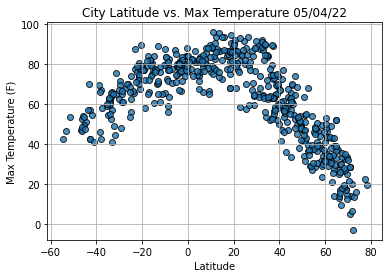

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


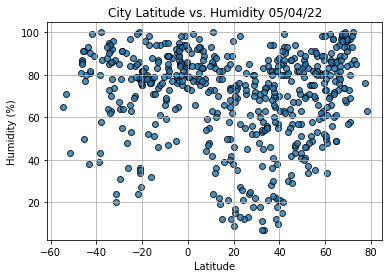

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

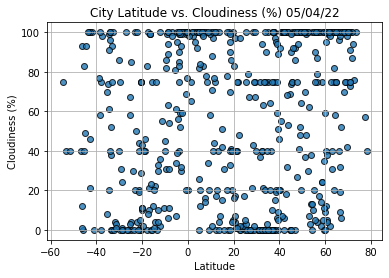

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

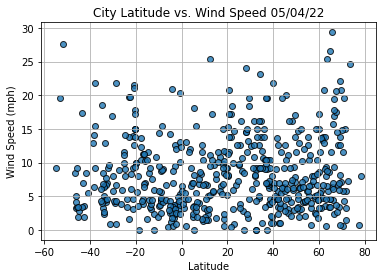

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()